In [2]:
import os
import concurrent.futures

In [3]:
import h5py
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py


In [4]:
import lib

In [5]:
os.environ["IMSIM_DATA"] = "/global/cfs/cdirs/desbalro"
os.environ["MEDS_DIR"] = "/global/cfs/cdirs/desbalro"

In [6]:
lib.plotting.setup()

In [93]:
onecolumn_kwargs = {
    "width": 2,
    "height": 2,
    "horizontal_margin": 8/12,
    "vertical_margin": 6/12,
    "gutter": 1,
    "fig_width": 3 + 4/12,
    "fig_height": 3,
}
twocolumn_kwargs = {
    "width": 2,
    "height": 2,
    "horizontal_margin": 8/12,
    "vertical_margin": 6/12,
    "gutter": 1 + 8/12,
    "fig_width": 7,
    "fig_height": 3,
}

---

In [8]:
input_file = "../N_gamma_alpha_v0_jk.hdf5"

In [12]:
with h5py.File(input_file, "r") as hf:
    cov = hf["shear/cov"][:]
    xi = hf["shear/mean_params"][:]
    alphas = np.unique(xi[:, 0])
    tomos = np.unique(xi[:, 1])

/global/u2/s/smau/projects/des/y6-image-sims-analysis/plots/lib/plotting.py:214: UserWarning: Total axes width (3.333333333333333) less than figure width (3.3333333333333335)
  warnings.warn(f"Total axes width ({total_width}) less than figure width ({fig_width})")


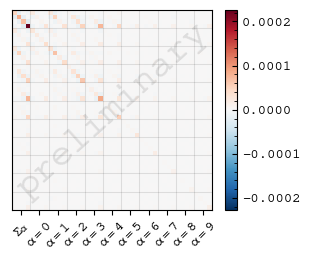

In [96]:
fig, axs = lib.plotting.make_axes(
    1, 1,
    **onecolumn_kwargs,
)

im = axs.imshow(cov, norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs, im)

_xticks = np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]
axs.set_xticks(
    _xticks + np.diff(_xticks)[0] / 2 - 0.5,
    # labels=[f"$\\alpha = {alpha}$" for alpha in alphas],
    labels=[
        f"$\\alpha = {alpha}$" if alpha >= 0
        else "$\\Sigma_{\\alpha}$"
        for alpha in alphas
    ],
    minor=False,
    ha="center",
    rotation=45,
)
axs.set_xticks(
    [],
    minor=True,
)

# _yticks = np.intersect1d(tomos, xi[:, 1], return_indices=True)[-1]
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=["tomography", "", "", ""],
#     minor=False,
#     ha="right",
#     rotation=90,
# )
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=[f"$i = {tomo}$" for tomo in tomos],
#     minor=False,
#     ha="right",
#     # rotation=45,
# )
axs.set_yticks(
    [],
)
axs.set_yticks(
    [],
    minor=True,
)

axs.tick_params(
    direction="out",
    top=False,
    right=False,
)

for _i in np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]:
    axs.axvline(_i - 0.5, alpha=0.1)
    axs.axhline(_i - 0.5, alpha=0.1)

lib.plotting.watermark(fig)

fig.savefig("cov.pdf")
plt.show()


In [29]:
corr = np.corrcoef(cov)

/global/u2/s/smau/projects/des/y6-image-sims-analysis/plots/lib/plotting.py:214: UserWarning: Total axes width (3.333333333333333) less than figure width (3.3333333333333335)
  warnings.warn(f"Total axes width ({total_width}) less than figure width ({fig_width})")


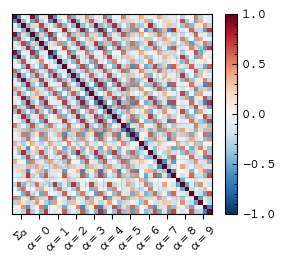

In [87]:
fig, axs = lib.plotting.make_axes(
    1, 1,
    **onecolumn_kwargs,
)

im = axs.imshow(corr, norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs, im)

_xticks = np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]
axs.set_xticks(
    _xticks + np.diff(_xticks)[0] / 2 - 0.5,
    # labels=[f"$\\alpha = {alpha}$" for alpha in alphas],
    labels=[
        f"$\\alpha = {alpha}$" if alpha >= 0
        else "$\\Sigma_{\\alpha}$"
        for alpha in alphas
    ],
    minor=False,
    ha="center",
    rotation=45,
)
axs.set_xticks(
    [],
    minor=True,
)

# _yticks = np.intersect1d(tomos, xi[:, 1], return_indices=True)[-1]
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=["tomography", "", "", ""],
#     minor=False,
#     ha="right",
#     rotation=90,
# )
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=[f"$i = {tomo}$" for tomo in tomos],
#     minor=False,
#     ha="right",
#     # rotation=45,
# )
axs.set_yticks(
    [],
)
axs.set_yticks(
    [],
    minor=True,
)

axs.tick_params(
    direction="out",
    top=False,
    right=False,
)

for _i in np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]:
    axs.axvline(_i - 0.5, alpha=0.1)
    axs.axhline(_i - 0.5, alpha=0.1)

lib.plotting.watermark(fig)

fig.savefig("corr.pdf")
plt.show()


---

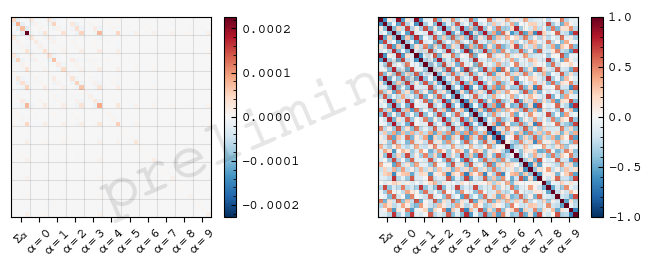

In [94]:
fig, axs = lib.plotting.make_axes(
    1, 2,
    **twocolumn_kwargs,
)

im = axs[0].imshow(cov, norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs[0], im)

_xticks = np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]
axs[0].set_xticks(
    _xticks + np.diff(_xticks)[0] / 2 - 0.5,
    # labels=[f"$\\alpha = {alpha}$" for alpha in alphas],
    labels=[
        f"$\\alpha = {alpha}$" if alpha >= 0
        else "$\\Sigma_{\\alpha}$"
        for alpha in alphas
    ],
    minor=False,
    ha="center",
    rotation=45,
)
axs[0].set_xticks(
    [],
    minor=True,
)

# _yticks = np.intersect1d(tomos, xi[:, 1], return_indices=True)[-1]
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=["tomography", "", "", ""],
#     minor=False,
#     ha="right",
#     rotation=90,
# )
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=[f"$i = {tomo}$" for tomo in tomos],
#     minor=False,
#     ha="right",
#     # rotation=45,
# )
axs[0].set_yticks(
    [],
)
axs[0].set_yticks(
    [],
    minor=True,
)

axs[0].tick_params(
    direction="out",
    top=False,
    right=False,
)

for _i in np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]:
    axs[0].axvline(_i - 0.5, alpha=0.1)
    axs[0].axhline(_i - 0.5, alpha=0.1)

im = axs[1].imshow(corr, norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs[1], im)

_xticks = np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]
axs[1].set_xticks(
    _xticks + np.diff(_xticks)[0] / 2 - 0.5,
    # labels=[f"$\\alpha = {alpha}$" for alpha in alphas],
    labels=[
        f"$\\alpha = {alpha}$" if alpha >= 0
        else "$\\Sigma_{\\alpha}$"
        for alpha in alphas
    ],
    minor=False,
    ha="center",
    rotation=45,
)
axs[1].set_xticks(
    [],
    minor=True,
)

# _yticks = np.intersect1d(tomos, xi[:, 1], return_indices=True)[-1]
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=["tomography", "", "", ""],
#     minor=False,
#     ha="right",
#     rotation=90,
# )
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=[f"$i = {tomo}$" for tomo in tomos],
#     minor=False,
#     ha="right",
#     # rotation=45,
# )
axs[1].set_yticks(
    [],
)
axs[1].set_yticks(
    [],
    minor=True,
)

axs[1].tick_params(
    direction="out",
    top=False,
    right=False,
)

for _i in np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]:
    axs[1].axvline(_i - 0.5, alpha=0.1)
    axs[1].axhline(_i - 0.5, alpha=0.1)

lib.plotting.watermark(fig)

fig.savefig("cov-corr.pdf")
plt.show()

